# [CoE202] note 05b. Polynomial regression with validation (model capacity)

- Class Date : 21.04.01.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

데이터 수가 100개일 때에 비해 1000개일때는 그래프의 모양이 바뀌지 않으며 robust해진다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data file from Google drive
# from google.colab import drive
import scipy.io

# drive.mount("/content/drive")
# mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab/data/data_polyfit_validation3.mat')
mat = scipy.io.loadmat('./data_polyfit_validation3.mat')

x = mat['x']
y = mat['y']

x = x[0:200]
y = y[0:200]

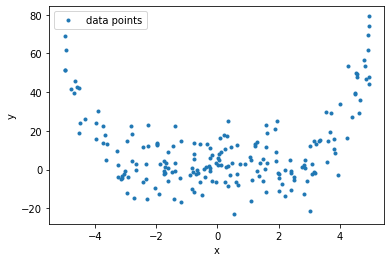

In [3]:
# plot data points
plt.plot(x, y, '.', label = 'data points')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

Let's shuffle the data before we split.

In [4]:
# shuffle dataset
new_idx = np.random.permutation(200)
x_shuffle = x[new_idx]
y_shuffle = y[new_idx]

And let's split the data set.

In [5]:
## split dataset 
#x_train = x_shuffle[0:500] # training data set
#x_val = x_shuffle[500:750] # validation data set
#x_test = x_shuffle[750:1000] # test data set

#y_train = y_shuffle[0:500] # training data set
#y_val = y_shuffle[500:750]  # validation data set
#y_test = y_shuffle[750:1000] # test data set

# split dataset 
x_train = x_shuffle[0:100] # training data set
x_val = x_shuffle[100:150] # validation data set
x_test = x_shuffle[150:200] # test data set

y_train = y_shuffle[0:100] # training data set
y_val = y_shuffle[100:150]  # validation data set
y_test = y_shuffle[150:200] # test data set

From note on polynomial regression, we studied two functions; poly_features, np_polynomial_regression. We will use these functions for validation.

In [ ]:
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    # Compute the feature matrix in stages
    # HINT: np.vander to generate a Vandermonde matrix.
    Phi = np.vander(X, K+1, increasing=True)  

    return Phi
  
def np_polynomial_regression(Phi, y):    
    # Phi: N x (K+1) matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: coefficients  (D x 1)
    
    N, D = Phi.shape
    Phi_t = Phi.T
    theta_ml = Phi_t @ Phi
    theta_ml = np.linalg.inv(theta_ml) 
    theta_ml = theta_ml @ Phi_t
    theta_ml = theta_ml @ y

    return theta_ml

With different K values in polynomial regression, let's observe how curve fits the data.

In [ ]:
# polynomial fitting
K = 3  # Test for K = 1, 2, 3

Phi_train = poly_features(x_train, K) # N x (K+1) feature matrix
theta = np_polynomial_regression(Phi_train, y_train) 

p = np.poly1d(np.flip(theta[:,0]))
print(p)

In [ ]:
# plot results
xp = np.linspace(-5, 5, 100) 
plt.plot(x_train, y_train, '.', label = 'training data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

Let us now look at a more systematic way to assess the quality of the polynomial that we are trying to fit. For this, we compute the root-mean-squared-error (RMSE) between the $y$-values predicted by our polynomial and the ground-truth $y$-values. The RMSE is then defined as
$$
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - y_n^\text{pred})^2}
$$
Write a function that computes the RMSE.

In [ ]:
def RMSE(y, ypred):
    rmse = np.sqrt(np.mean((y-ypred)**2))         
    
    return rmse

Now compute the RMSE for different degrees of the polynomial we want to fit.

In [ ]:
K_max = 20
rmse_train = np.zeros((K_max,))

for k in range(1, K_max+1):
    # perform kth order polynomial fitting using traing set (x_train, y_train)
    
    # feature matrix for training data
    Phi_train = poly_features(x_train, k)
    
    # estimate theta
    theta = np_polynomial_regression(Phi_train, )
    
    # predict y-values of training set
    #ypred_train =  

    rmse_train[k-1] = RMSE(y_train, y_pred)  # index starts from 0


plt.figure()
plt.plot(np.arange(1, K_max+1), rmse_train)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE");

The RMSE on the training data is somewhat misleading, because we are interested in the generalization performance of the model. Therefore, we are going to compute the RMSE on the test set and use this to choose a good polynomial degree.

In [ ]:
K_max = 20
rmse_train = np.zeros((K_max,))
rmse_val = np.zeros((K_max,))

for k in range(1, K_max+1):
    # perform kth order polynomial fitting using traing set (x_train, y_train)
    
    # feature matrix for training data
    Phi_train = 
    
    # estimate theta
    theta_train = 
    
    # predict y-values of training set
    ypred_train =  

    rmse_train[k-1] = RMSE(ypred_train, y_val)  # index starts from 0

    Phi_val = 
    theta_val = 
    ypred_val = 
    rmse_train[k-1] = RMSE(ypred_val, y_val)


plt.figure()
plt.plot(np.arange(1, K_max+1), rmse_train)
plt.plot(np.arange(1, K_max+1), rmse_val)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE");

In [ ]:
# choose final capacity (order) and do testing
K = 2  # Test for K = 2

Phi_train = poly_features(x_train, K) # N x (K+1) feature matrix
theta = np_polynomial_regression(Phi_train, y_train) 

p = np.poly1d(np.flip(theta[:,0]))
        
# feature matrix for validation data
Phi_test = poly_features(x_test, K) 
    
# prediction (validation set)
ypred_test = Phi_test @ theta 
    
# RMSE on validation set
rmse_test = RMSE(y_test, ypred_test)
print(rmse_test)

Below is just to see what happens with a large K.

In [ ]:
# polynomial fitting
K = 20

Phi_train = poly_features(x_train, K) # N x (K+1) feature matrix
theta = np_polynomial_regression(Phi_train, y_train) 
p = np.poly1d(np.flip(theta[:,0]))


# plot results
xp = np.linspace(-5, 5, 100) 
plt.figure()
plt.plot(x_train, y_train, '.', label = 'training data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

# plot results
xp = np.linspace(-5, 5, 100) 
plt.figure()
plt.plot(x_val, y_val, '.', label = 'validation data')
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')